In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, plot_confusion_matrix

In [39]:
train = pd.read_excel('train.xlsx')
test = pd.read_excel('test.xlsx')

In [40]:
train.shape

(891, 12)

In [41]:
traintest = pd.concat([train, test])
traintest.shape

(1309, 12)

In [42]:
traintest.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
traintest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [44]:
traintest.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [45]:
'Braund, Mr. Owen Harris'.split(',')[1].split(' ')[1]

'Mr.'

In [46]:
def get_designation(row):
    row['Designation'] = row['Name'].split(',')[1].split(' ')[1]
    return row

traintest = traintest.apply(get_designation, axis = 1)
traintest.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Designation
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.


In [47]:
traintest.drop('PassengerId', axis = 1, inplace = True)

In [48]:
traintest.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Designation
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.


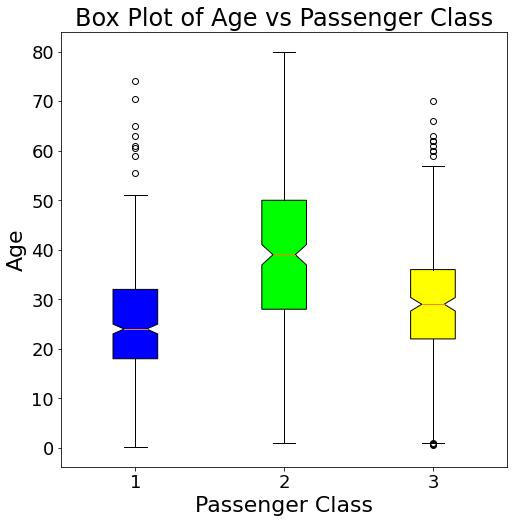

In [49]:
pclass_age_data = []
for pclass in traintest['Pclass'].unique():
    pclass_age_data.append(traintest[traintest['Pclass'] == pclass]['Age'].dropna().values)
    
plt.figure(figsize = (8,8))

box = plt.boxplot(pclass_age_data, notch=True, patch_artist=True)

colors = ['#0000FF', '#00FF00', '#FFFF00']

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    
plt.title('Box Plot of Age vs Passenger Class', size = 24)
plt.xlabel('Passenger Class', size = 22)
plt.ylabel('Age', size = 22)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.show()

In [50]:
def fill_age_with_median(row):
    if row['Age'] != row['Age']:
        if row['Pclass'] == 1:
            row['Age'] = 24
        elif row['Pclass'] == 2:
            row['Age'] = 39
        else:
            row['Age'] = 29
    return row

traintest = traintest.apply(fill_age_with_median, axis = 1)

traintest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    float64
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
 11  Designation  1309 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 132.9+ KB


In [51]:
traintest = traintest[~traintest['Embarked'].isna()]

In [52]:
traintest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1307 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     889 non-null    float64
 1   Pclass       1307 non-null   int64  
 2   Name         1307 non-null   object 
 3   Sex          1307 non-null   object 
 4   Age          1307 non-null   float64
 5   SibSp        1307 non-null   int64  
 6   Parch        1307 non-null   int64  
 7   Ticket       1307 non-null   object 
 8   Fare         1306 non-null   float64
 9   Cabin        293 non-null    object 
 10  Embarked     1307 non-null   object 
 11  Designation  1307 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 132.7+ KB


In [53]:
traintest['Cabin'].fillna('No Cabin', inplace = True)

In [54]:
traintest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1307 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     889 non-null    float64
 1   Pclass       1307 non-null   int64  
 2   Name         1307 non-null   object 
 3   Sex          1307 non-null   object 
 4   Age          1307 non-null   float64
 5   SibSp        1307 non-null   int64  
 6   Parch        1307 non-null   int64  
 7   Ticket       1307 non-null   object 
 8   Fare         1306 non-null   float64
 9   Cabin        1307 non-null   object 
 10  Embarked     1307 non-null   object 
 11  Designation  1307 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 132.7+ KB


In [55]:
traintest['Fare'].fillna(traintest['Fare'].median(), inplace = True)

In [56]:
traintest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1307 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     889 non-null    float64
 1   Pclass       1307 non-null   int64  
 2   Name         1307 non-null   object 
 3   Sex          1307 non-null   object 
 4   Age          1307 non-null   float64
 5   SibSp        1307 non-null   int64  
 6   Parch        1307 non-null   int64  
 7   Ticket       1307 non-null   object 
 8   Fare         1307 non-null   float64
 9   Cabin        1307 non-null   object 
 10  Embarked     1307 non-null   object 
 11  Designation  1307 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 132.7+ KB


male      843
female    464
Name: Sex, dtype: int64


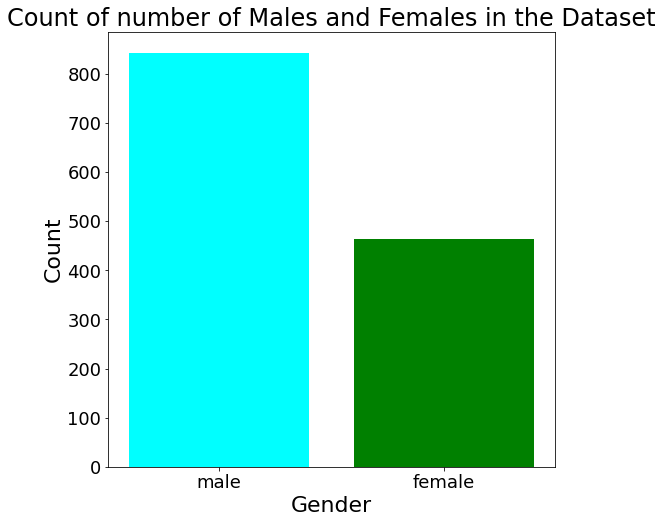

In [64]:
gender_counts = traintest['Sex'].value_counts()
print(gender_counts)
plt.figure(figsize = (8,8))
plt.bar(gender_counts.index, gender_counts.values, color = ['cyan', 'green'])
plt.title('Count of number of Males and Females in the Dataset', size = 24)
plt.xlabel('Gender', size = 22)
plt.ylabel('Count', size = 22)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.show()

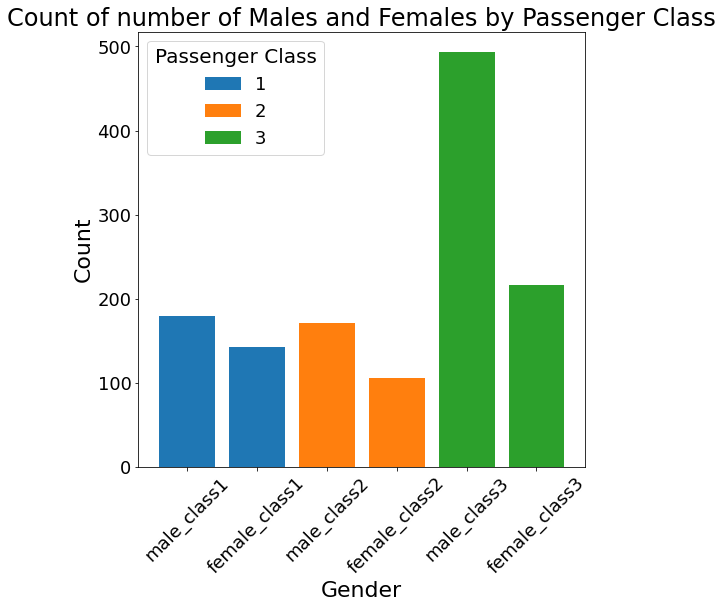

In [98]:
plt.figure(figsize = (8,8))
offsets = [-0.33, 0, 0.33]
grouped = traintest.groupby(['Pclass'])

group1 = grouped.get_group(1)
gender_counts1 = group1['Sex'].value_counts()
plt.bar(gender_counts1.index+'_class1', gender_counts1.values, label='1')
group2 = grouped.get_group(2)
gender_counts2 = group2['Sex'].value_counts()
plt.bar(gender_counts2.index+'_class2', gender_counts2.values, label='2')
group3 = grouped.get_group(3)
gender_counts3 = group3['Sex'].value_counts()
plt.bar(gender_counts3.index+'_class3', gender_counts3.values, label='3')

plt.title('Count of number of Males and Females by Passenger Class', size = 24)
plt.xlabel('Gender', size = 22)
plt.ylabel('Count', size = 22)
plt.xticks(size = 18, rotation = 45)
plt.yticks(size = 18)
plt.legend(title = 'Passenger Class', prop={'size': 18}, title_fontsize = 20)
plt.show()

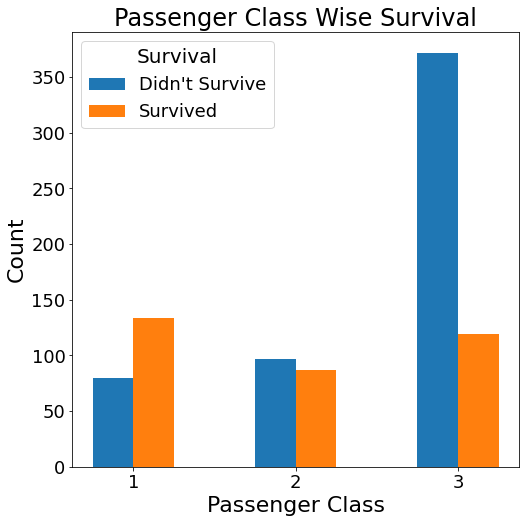

In [89]:
survival = {0: "Didn't Survive", 1: 'Survived'}
offsets = [-0.125, 0.125]
plt.figure(figsize = (8,8))

train = traintest[~traintest['Survived'].isna()]
grouped = train.groupby(['Survived'])
for i, survived in enumerate(train['Survived'].unique()):
    group = grouped.get_group(survived)
    pclass_counts = group['Pclass'].value_counts()
    plt.bar(pclass_counts.index + offsets[i] , pclass_counts.values, width = 0.25, label=survival[survived])
plt.title('Passenger Class Wise Survival', size = 24)
plt.xlabel('Passenger Class', size = 22)
plt.ylabel('Count', size = 22)
plt.xticks(ticks = [1, 2, 3], size = 18)
plt.yticks(size = 18)
plt.legend(title = 'Survival', prop={'size': 18}, title_fontsize = 20)
plt.show()

In [99]:
traintest.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Designation
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,No Cabin,S,Mr.
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,No Cabin,S,Miss.
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,No Cabin,S,Mr.


In [100]:
traintest.drop(['Name', 'Ticket'], axis = 1, inplace = True)

In [101]:
traintest.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Designation
0,0.0,3,male,22.0,1,0,7.2500,No Cabin,S,Mr.
1,1.0,1,female,38.0,1,0,71.2833,C85,C,Mrs.
2,1.0,3,female,26.0,0,0,7.9250,No Cabin,S,Miss.
3,1.0,1,female,35.0,1,0,53.1000,C123,S,Mrs.
4,0.0,3,male,35.0,0,0,8.0500,No Cabin,S,Mr.


In [102]:
traintest['Cabin'] = traintest['Cabin'].apply(lambda x: x[0])
traintest.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Designation
0,0.0,3,male,22.0,1,0,7.2500,N,S,Mr.
1,1.0,1,female,38.0,1,0,71.2833,C,C,Mrs.
2,1.0,3,female,26.0,0,0,7.9250,N,S,Miss.
3,1.0,1,female,35.0,1,0,53.1000,C,S,Mrs.
4,0.0,3,male,35.0,0,0,8.0500,N,S,Mr.


In [105]:
encoder_cols = ['Sex', 'Cabin', 'Embarked', 'Designation']

for col in encoder_cols:
    le = LabelEncoder()
    traintest[col] = le.fit_transform(traintest[col])
    
traintest.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Designation
0,0.0,3,1,22.0,1,0,7.2500,7,2,12
1,1.0,1,0,38.0,1,0,71.2833,2,0,13
2,1.0,3,0,26.0,0,0,7.9250,7,2,9
3,1.0,1,0,35.0,1,0,53.1000,2,2,13
4,0.0,3,1,35.0,0,0,8.0500,7,2,12


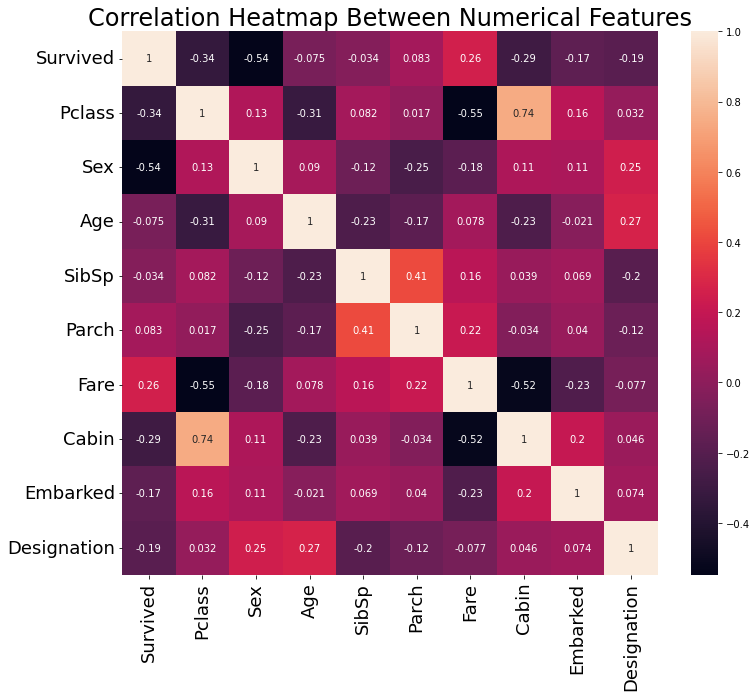

In [111]:
plt.figure(figsize = (12,10))
sns.heatmap(traintest[~traintest['Survived'].isna()].corr(), annot = True)
plt.title('Correlation Heatmap Between Numerical Features', size = 24)
plt.xticks(size = 18)
plt.yticks(size = 18)

plt.show()

In [112]:
train = traintest[~traintest['Survived'].isna()]
test = traintest[traintest['Survived'].isna()]

In [113]:
X = train.drop('Survived', axis = 1)
y = train['Survived']

X_Train, X_Val, y_train, y_val = train_test_split(X, y, test_size = 0.15, stratify = y)

In [115]:
model = LogisticRegression(n_jobs=-1, max_iter=1000)
model.fit(X_Train,y_train)
y_pred = model.predict(X_Val)
print("F1-Score: ", f1_score(y_pred, y_val))

F1-Score:  0.7735849056603775


/home/aryan/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 1008x1008 with 0 Axes>

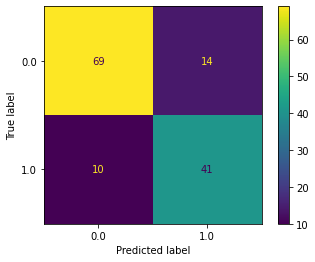

In [138]:
plt.figure(figsize = (14,14))
plot_confusion_matrix(model, X_Val, y_val)
plt.show()

[7.87100296e-01 2.53053632e+00 3.33428027e-02 3.14317782e-01
 1.05575878e-01 7.82596033e-04 1.35206288e-01 2.07555781e-01
 5.58409912e-02]


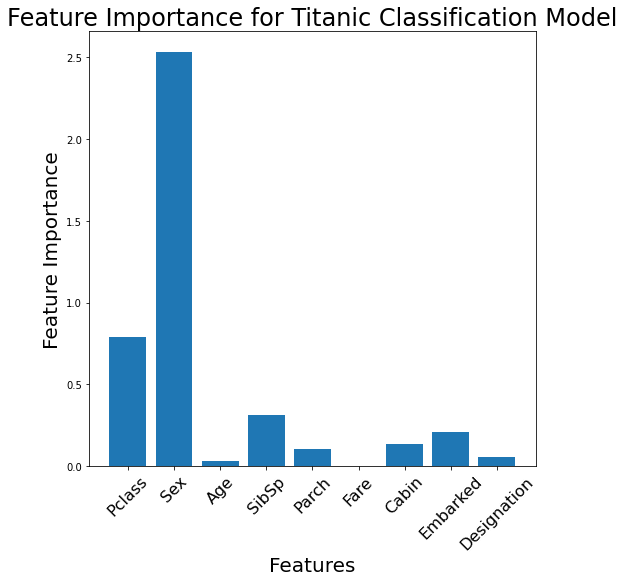

In [121]:
importance = np.abs(model.coef_[0])
# plot feature importance
plt.figure(figsize = (8,8))
print(importance)
plt.bar([x for x in range(len(importance))], importance)
plt.xticks(ticks = range(len(importance)), labels = model.feature_names_in_, rotation = 45, size = 16)
plt.title('Feature Importance for Titanic Classification Model', size = 24)
plt.xlabel('Features', size = 20)
plt.ylabel('Feature Importance', size = 20)
plt.show()

In [130]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked',
       'Designation'],
      dtype='object')

In [134]:
male_row = np.array([[3, 1, 22.0, 1, 0, 7.2500, 7, 2, 12],
                      [1, 1, 38.0, 1, 0, 71.2833, 2, 0, 12]])
female_row = np.array([[3, 0, 22.0, 1, 0, 7.2500, 7, 2, 13],
                      [1, 0, 38.0, 1, 0, 71.2833, 2, 0, 13]])
df = pd.DataFrame(male_row)
df = df.append(pd.DataFrame(female_row))
df.reset_index(drop = True, inplace = True)
df.columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked',
       'Designation']
df['Sex'] = df['Sex'].apply(lambda x: 'Male' if x == 1.0 else 'Female')
df['Designation'] = df['Designation'].apply(lambda x: 'Mr.' if x == 12.0 else 'Mrs.')
print(df)
print('\n\n')
print("Male Survival: ", model.predict(male_row))
print("Female Survival: ", model.predict(female_row))

   Pclass     Sex   Age  SibSp  Parch     Fare  Cabin  Embarked Designation
0     3.0    Male  22.0    1.0    0.0   7.2500    7.0       2.0         Mr.
1     1.0    Male  38.0    1.0    0.0  71.2833    2.0       0.0         Mr.
2     3.0  Female  22.0    1.0    0.0   7.2500    7.0       2.0        Mrs.
3     1.0  Female  38.0    1.0    0.0  71.2833    2.0       0.0        Mrs.



Male Survival:  [0. 0.]
Female Survival:  [1. 1.]


/tmp/ipykernel_27203/3434404597.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(female_row))
/home/aryan/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/aryan/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
